###Problem Statement

Here is the problem statement as I understand it so far. 

**"Given the spatial coordinates of various astrocytes, determine a skeletonization of the morphology of a new astrocyte embeded within this population of astrocytes."**

In layman's terms, if I had a dataset with 5 astrocytes, 4 in the corners and one in the middle, if I removed the one in the middle could I determine a skeletonization of its morphology based on the locations of its and its neighbor's centroids? I made a little graphic to visualize what I'm trying to say...

![](media/sample_2d_problem.png)

$A_0$ is the target astrocyte. Given the spatial coordinates of its neighbor's centroids, $\vec{A}^{(i)}=<a_1^{(i)}, a_2^{(i)}> \hspace{5pt} i \in \{1,2,3,4\}$, can we determine a skeletonization of $A_0$'s processes? Or perhaps instead of thinking about it like processes we can look for curves along the astrocyte's principle directions, i.e. perhaps something like the pink curve?

To help solve this problem, we have information from the dataset that can be extracted, as well as assumptions steming from the hypothesis being posed by Monica and James. 

###Available Information
The dataset provided is a volumetric scan of neocortical tissue containing some 6-10 astrocytes. From this scan we can determine the centroid of each astrocyte's soma, the number of processes they contain and a rough outline of their morphology.

###Hypothesis
Astrocytes express some kind of chemicals or molecules which act as a *deterrent* to other astrocytes. In other words, astrocytes will try to align themselves maximally far away from one another.

###The Approach
After iterating over a few failed attempts at solving this, the method with most promise is essentially simulating the growth of the processes away from the soma. First, we draw a circle of radius $r$ around the target astrocyte, $A_0$. From this circle, choose $m$ points equally spaced along the circle. Each of these points are going to be a process and these processes are going to "grow" subject to some rules/constraints. Ideally, after the processes have fully *grown*, they will comprise the skeletonization of the astrocyte.

###The Math
 I will first solve this problem in 2 dimensions and I will need some notional conventions to describe things. 

####Notation
The centroid of an astrocyte will be denoted by a capital $\vec{A}$ and we will distinguish different astrocytes with a superscript $(i)$. The $i^{th}$ astrocyte, $\vec{A}^{(i)}$, will have components denoted by lowercase $a$'s and each component will be distinguished by a subscript. For $n$ asotryctes we have, $\vec{A}^{(i)}=<a_1^{(i)}, a_2^{(i)}> \hspace{4pt} i \in \{1,\ldots,n\}$.

The target astrocyte, $A_0$, will have $m$ processes each denoted by a superscript $(j)$. Thus the $j^{th}$ process is denoted by $\vec{P}^{(j)}$. The path or morphological extent of each process will be described by a sequence of points. The $k^{th}$ point on process $j$ will be denoted as $\vec{P}^{(j)}_k$. Lastly, each point along the process will have its individual components which will be denoted using lowercase $p$'s and distinguished by a subsubscript. For $m$ processes we have $\vec{P}^{(j)}_k = <p^{(j)}_{k_1}, p^{(j)}_{k_2}> \hspace{4pt} j \in \{1,\ldots,m\}$.

####Constraints
Using our new notation we can describe the problem mathematically. Let us assume we are at point $k$ on process $j$. The question is, how do we determine the next point that the process should move/grow to? Or, given $\vec{P}^{(j)}_k$ how do we determine $\vec{P}^{(j)}_{k+1}$? Theoretically if we can derive this update rule, then we just allow each process to grow subject to its constraints and the result should be the skeletonization. 

So we want to find the displacement, $\vec{d}$, as we move from $\vec{P}^{(j)}_{k}$ to $\vec{P}^{(j)}_{k+1}$. So we define the displacement as follows

$$\vec{d} = \vec{P}^{(j)}_{k+1} - \vec{P}^{(j)}_{k}$$

For more convenient algebraic manipulations I will make one more definition.

$$\vec{\alpha}^{(i)} = \vec{A}^{(i)} - \vec{P}^{(j)}_{k}$$

We now impose the constraints presented by the aforementioned hypothesis. The point $\vec{P}^{(j)}_{k+1}$ that the process moves to must be maximally far away from all astrocytes. This gives us our objective function which we wish to maximize.

$$g(\vec{d}) = \frac{1}{2} \sum_{i=1}^{n} \left\lVert \vec{d}-\vec{\alpha}^{(i)} \right\rVert ^2$$

We restrict the search space to be on a circle of radius $r$ around the previous point $\vec{P}^{(j)}_{k}$. This constrains our objective function.

$$ \left\lVert \vec{d} \right\rVert = r $$

We will now use the constraint to make the objective function univariate and optimize it using the standard calculus technique of setting the first derivative equal to zero. 

Let $\vec{d} = <d_1,d_2>$. Our optimization problem can be rewritten as

$$ g(\vec{d}) = \frac{1}{2}\sum_{i=1}^{n} (d_1-\alpha_1^{(i)})^2 + (d_2 - \alpha_2^{(i)})^2$$

$$ d_1^2 + d_2^2 = r^2$$

Assuming $d_1$ is a function of $d_2$, we will differentiate the objective function with respect to $d_2$

$$ \frac{dg}{dd_2} = \sum_{i=1}^{n} (d_1-\alpha_1^{(i)})\frac{dd_1}{dd_2} + (d_2 - \alpha_2^{(i)})$$
$$ \frac{dg}{dd_2} = \sum_{i=1}^{n} d_1 \frac{dd_1}{dd_2} - \alpha_1^{(i)} \frac{dd_1}{dd_2} + d_2 - \alpha_2^{(i)}$$
$$ \frac{dg}{dd_2} = d_1 \frac{dd_1}{dd_2} \sum_{i=1}^{n}1 -  \frac{dd_1}{dd_2} \sum_{i=1}^{n} \alpha_1^{(i)} + d_2 \sum_{i=1}^{n}1 - \sum_{i=1}^{n} \alpha_2^{(i)}$$

To simplify notation let us define 
$$\sum_{i=1}^{n} \alpha_1^{(i)} = \alpha_1$$
$$\sum_{i=1}^{n} \alpha_2^{(i)} = \alpha_2$$
In addition we will use the following fact
$$\sum_{i=1}^{n} 1 = n$$

Incorporating the above information the derivative of the objective function becomes

$$ \frac{dg}{dd_2} = n d_1 \frac{dd_1}{dd_2} -  \frac{dd_1}{dd_2} \alpha_1 + n d_2 - \alpha_2$$

We now need to incorporate the constraint. This is where things could become pretty ugly. However if instead of explicitly solving for $d_1$ and differentiating, we differentiate implicitly we find a much more convenient substitution.

$$ \frac{d}{dd_2}\bigg[ d_1^2 + d_2^2 = r^2 \bigg] \hspace{5pt} \rightarrow \hspace{5pt} 2d_1\frac{dd_1}{dd_2} + 2d_2 = 0$$
$$ \frac{dd_1}{dd_2} = -\frac{d_2}{d_1} $$

We put this into the differentiated objective function above to get

$$ \frac{dg}{dd_2} = n d_1 (-\frac{d_2}{d_1}) +  \frac{d_2}{d_1} \alpha_1 + n d_2 - \alpha_2$$
$$ \frac{dg}{dd_2} = -n d_2 +  \frac{d_2}{d_1} \alpha_1 + n d_2 - \alpha_2$$
$$ \frac{dg}{dd_2} = \frac{d_2}{d_1} \alpha_1 - \alpha_2$$

Now we set the derivative equal to zero and solve for $d_2$.
$$ \frac{d_2}{d_1} \alpha_1 - \alpha_2 = 0$$
$$ d_2 = d_1 \frac{\alpha_2}{\alpha_1}$$

I will make another substitution here to further simplify the notation

$$ \alpha = \frac{\alpha_2}{\alpha_1} $$

So we have that

$$ d_2 = d_1 \alpha$$

We are almost done. If we square both sides of this relation we get

$$ d_2^2 = d_1^2 \alpha^2$$

but recall from our constraint that

$$ d_1^2 + d_2^2 = r^2 \hspace{5pt} \rightarrow \hspace{5pt} d_1^2 = r^2 - d_2^2$$

Therefore

$$ d_2^2 = (r^2 - d_2^2) \alpha^2$$
$$ d_2^2 = r^2 \alpha^2 - d_2^2 \alpha^2$$
$$ d_2^2 + d_2^2 \alpha^2 = r^2 \alpha^2$$
$$ d_2^2( 1 + \alpha^2 ) = r^2 \alpha^2$$

We now have $d_2$

$$ d_2 = r\frac{\alpha}{\sqrt{1+\alpha^2}}$$

We use this to find $d_1$

$$d_1^2 = r^2 - d_2^2 \hspace{5pt} \rightarrow \hspace{5pt} d_1^2 = r^2 - \frac{r^2\alpha^2}{1+\alpha^2}$$
$$d_1^2 = r^2( 1 - \frac{\alpha^2}{1+\alpha^2})$$
$$d_1^2 = r^2( \frac{1+\alpha^2}{1+\alpha^2} - \frac{\alpha^2}{1+\alpha^2})$$
$$d_1^2 = r^2\frac{1+\alpha^2-\alpha^2}{1+\alpha^2}$$
$$d_1^2 = r^2\frac{1}{1+\alpha^2}$$

After taking the square root of both sides we have found $d_1$.

$$d_1 = r\frac{1}{\sqrt{1+\alpha^2}}$$

With $d_1$ and $d_2$ we have finally found our displacement vector!

$$\vec{d} = r<\frac{1}{\sqrt{1+\alpha^2}}, \frac{\alpha}{\sqrt{1+\alpha^2}}>$$

We can now define our update rule...

$$\vec{P}^{(j)}_{k+1} = \vec{P}^{(j)}_{k} + r<\frac{1}{\sqrt{1+\alpha^2}}, \frac{\alpha}{\sqrt{1+\alpha^2}}>$$

Where we define $\alpha$ as follows 
$$\alpha = \sum_{i=1}^n \frac{a^{(i)}_2 - \vec{p}^{(j)}_{k_2}}{a^{(i)}_1 - \vec{p}^{(j)}_{k_1}}$$

That should be it, for now. Last night I tried to show that this solution was in fact the maximzer of the objective function, I think I did it but I need to go through that math again before I write it up.

###Discussion
So the way I envision it, we look at a dataset and determine the centroids of all astrocytes. Then we find the target astrocyte and count the number of processes it has, call it $m$. We use the targest astrocyte's centroid as the seed location and then *grow* $m$ processes equally spaced on a circle around the target centroid. Then we see what happens!

This is just a first attempt. I can imagine the objective function being too relaxed, i.e. currently at each step the process is allowed to move in any of 360 degrees of rotation. This is extremely unrealistic. I will test this idea outlined above first of course, but I can already imagine adding another term to the objective function that penalizes the new point for how large the angle of rotation is between the vector formed from the previous and current points as well as the vector formed from the current and next ponits. Here is a picture of what I mean.

![](media/angle_cost.png)

So the larger the angle the larger the penalty. 

Also, when this problem moves into 3 dimensions we will have an extra degree of freedom and will need another constraint. However, I suspect this won't be a huge problem as I've just pointed out how relaxed the current rules are. Depending on the rules and their formulation it may become infeasible to derive a nice analytic expression for the update rule, as was done in this case. It will likely need to be solved numerically.

###Test Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let us create a simple test environment. We will use the cartesian coordinate system, $[-4,4]\times[-4,4]$. We will place the target astrocyte, $A_0$, at the origin and 6 neighboring astrocytes along either side as shown in the following diagram.

In [4]:
A = np.array([(0,0),(-3,3),(-3,0),(-3,-3),(3,3),(3,0),(3,-3)])

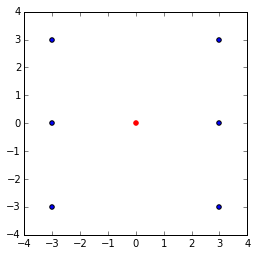

In [8]:
plt.axes().set_aspect('equal')
plt.scatter(A.T[0][1:], A.T[1][1:])
plt.scatter(A[0,0],A[0,1], color='r')

Now we create a circle of radius 1 around the target astrocyte, $A_0$.

In [9]:
x = np.linspace(-1,1,50)
r = 1.0

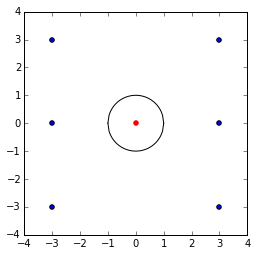

In [11]:
plt.axes().set_aspect('equal')
plt.scatter(A.T[0][1:], A.T[1][1:])
plt.scatter(A[0,0],A[0,1], color='r')
plt.plot(x,np.sqrt(r*r-x*x),color='k')
plt.plot(x,-np.sqrt(r*r-x*x),color='k')

We now create the seed points on the circle for the processes to *grow* from. We will choose $m=4$ for now. I choose them randomly space for testing purposes

In [14]:
m = 4
theta = 2*np.pi*np.random.random(m)
P = np.array((zip(np.cos(theta),np.sin(theta))))

theta =  [ 0.22167669  6.01455519  1.3516863   4.8751317 ]


In [15]:
P

array([[ 0.97553017,  0.21986559],
       [ 0.96413538, -0.26541093],
       [ 0.21736101,  0.97609128],
       [ 0.16202529, -0.98678661]])

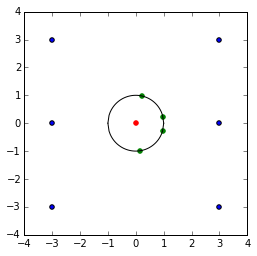

In [17]:
plt.axes().set_aspect('equal')
plt.scatter(A.T[0][1:], A.T[1][1:])
plt.scatter(A[0,0],A[0,1], color='r')
plt.plot(x,np.sqrt(r*r-x*x),color='k')
plt.plot(x,-np.sqrt(r*r-x*x),color='k')
plt.scatter(P.T[0],P.T[1],color='g')

In [49]:
def grow(A,p1,step):
    alpha = 0
    for a in A:
        tmp = a-p1
        if tmp[0] == 0:
            alpha += tmp[1]
        else:
            alpha += tmp[1]/float(tmp[0])
    den = np.sqrt(1+alpha*alpha)
    p2 = p1 + (step/den)*np.array((1, alpha))
    
    return p2

In [ ]:
processes = []
for p in P:
    processes.append([p])

In [56]:
def update_processes(processes,step):
    for p in processes: 
        p.append(grow(A,p[-1],step))
        
    return processes

In [ ]:
def update_plot(processes):

In [61]:
step = 0.25
plt.show()
print "Hello!"

Hello!
